# CAMCAN Dataset

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


cc_train = pd.read_csv('./CAMCAN_train.csv')
cc_test = pd.read_csv('./CAMCAN_test.csv')



cc_train = cc_train.iloc[:, :159]
cc_test = cc_test.iloc[:, :159]

cc_train.drop(['ID', 'hand','cattell', 'ICV'], axis = 1, inplace =True)
cc_test.drop(['ID','hand','cattell', 'ICV'], axis = 1, inplace =True)

print('cc_train.csv Shape : ', cc_train.shape)
print('cc_test.csv Shape : ', cc_test.shape)

cc_train.csv Shape :  (500, 155)
cc_test.csv Shape :  (101, 155)


In this dataset, they include sex, age columns.

So, practically we use 153 columns when we use this dataset

In [15]:
cc_x_train = cc_train.drop('age', axis = 1)
cc_y_train = cc_train[['age']]

cc_x_test = cc_test.drop('age', axis = 1)
cc_y_test = cc_test[['age']]

In [16]:
cc_y_test

,age
0,25
1,28
2,25
3,23
4,21
...,...
96,79
97,81
98,79
99,79


In [17]:
cc_x_train.to_csv('./CAMCAN_153/cc_x_train.csv')
cc_y_train.to_csv('./CAMCAN_153/cc_y_train.csv')

cc_x_test.to_csv('./CAMCAN_153/cc_x_test.csv')
cc_y_test.to_csv('./CAMCAN_153/cc_y_test.csv')

In [58]:
cc_train.to_csv('./CAMCAN_153/cc_train.csv')
cc_test.to_csv('./CAMCAN_153/cc_test.csv')

# HCP Dataset

In [43]:
hcp_152 = pd.read_csv('./HCP_152features.csv')
hcp_1200 = pd.read_csv('./HCP_1200.csv')

print('hcp_152 shape : ', hcp_152.shape)
print('hcp_1200 shape : ', hcp_1200.shape)

hcp_152 shape :  (1113, 155)
hcp_1200 shape :  (1113, 157)


In [44]:
for i in hcp_1200.columns:
    print(i)

Subject
Age
Sex
PMAT24_A_CR
FS_BrainSeg_Vol
FS_L_LatVent_Vol
FS_L_ThalamusProper_Vol
FS_L_Caudate_Vol
FS_L_Putamen_Vol
FS_L_Pallidum_Vol
FS_L_Hippo_Vol
FS_L_Amygdala_Vol
FS_L_AccumbensArea_Vol
FS_R_LatVent_Vol
FS_R_ThalamusProper_Vol
FS_R_Caudate_Vol
FS_R_Putamen_Vol
FS_R_Pallidum_Vol
FS_R_Hippo_Vol
FS_R_Amygdala_Vol
FS_R_AccumbensArea_Vol
FS_L_Bankssts_Thck
FS_L_Caudalanteriorcingulate_Thck
FS_L_Caudalmiddlefrontal_Thck
FS_L_Cuneus_Thck
FS_L_Entorhinal_Thck
FS_L_Fusiform_Thck
FS_L_Inferiorparietal_Thck
FS_L_Inferiortemporal_Thck
FS_L_Isthmuscingulate_Thck
FS_L_Lateraloccipital_Thck
FS_L_Lateralorbitofrontal_Thck
FS_L_Lingual_Thck
FS_L_Medialorbitofrontal_Thck
FS_L_Middletemporal_Thck
FS_L_Parahippocampal_Thck
FS_L_Paracentral_Thck
FS_L_Parsopercularis_Thck
FS_L_Parsorbitalis_Thck
FS_L_Parstriangularis_Thck
FS_L_Pericalcarine_Thck
FS_L_Postcentral_Thck
FS_L_Posteriorcingulate_Thck
FS_L_Precentral_Thck
FS_L_Precuneus_Thck
FS_L_Rostralanteriorcingulate_Thck
FS_L_Rostralmiddlefrontal_Thck

In [45]:
hcp_1200 = hcp_1200.drop(['Subject','PMAT24_A_CR'], axis = 1)
print(hcp_1200.shape)

(1113, 155)


# HCP Dataset Split

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from verstack.stratified_continuous_split import scsplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def df_info_hcp(df): 
    # Shape
    print('shape : ', df.shape)
    
    # DF가 바뀌면 이부분만 바뀐다.
    label = df['Age']
    # Minimum Value
    print('Min : {:.2f}'.format(np.min(label)))
    # Maximum Value
    print('Max : {:.2f}'.format( np.max(label)))

    print('Range : {:.2f} ~ {:.2f}'.format( np.min(label), np.max(label)))
    
    print('Median : {:.2f}'.format(np.median(label)))
    print('Standard Deviation : {:.2f}'.format(np.std(label)) )
    
    plt.title("Age Distribution")
    sns.histplot(data = df, x = 'Age')

shape :  (1113, 155)
Min : 22.00
Max : 37.00
Range : 22.00 ~ 37.00
Median : 29.00
Standard Deviation : 3.70


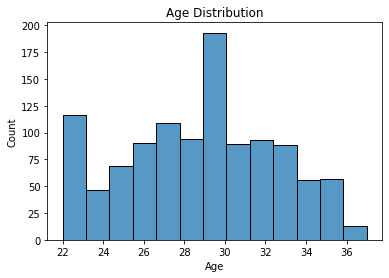

In [47]:
df_info_hcp(hcp_1200)

In [48]:
hcp_y = hcp_1200['Age']
hcp_X = hcp_1200.drop('Age', axis = 1)

# 5 bins may be too few for larger datasets.
bins     = np.linspace(start=22, stop=37, num=5)
y_binned = np.digitize(hcp_y, bins, right=True)

hcp_x_train, hcp_x_test, hcp_y_train, hcp_y_test = train_test_split(hcp_X, hcp_y, test_size = 0.2, stratify=y_binned, shuffle = True, random_state = 1)

In [49]:
print(hcp_x_train.shape)
print(hcp_y_train.shape)

print(hcp_x_test.shape)
print(hcp_y_test.shape)

(890, 154)
(890,)
(223, 154)
(223,)


In [50]:
hcp_train = pd.concat([hcp_x_train, hcp_y_train], axis =1)
hcp_test = pd.concat([hcp_x_test, hcp_y_test], axis =1)

shape :  (890, 155)
Min : 22.00
Max : 37.00
Range : 22.00 ~ 37.00
Median : 29.00
Standard Deviation : 3.70


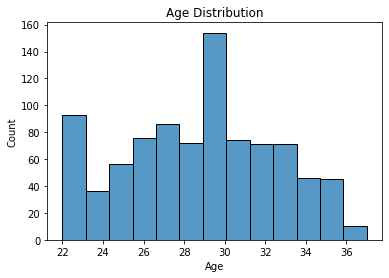

In [51]:
df_info_hcp(hcp_train)

shape :  (223, 155)
Min : 22.00
Max : 36.00
Range : 22.00 ~ 36.00
Median : 29.00
Standard Deviation : 3.69


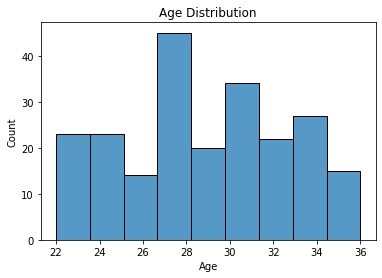

In [52]:
df_info_hcp(hcp_test)

In [53]:
hcp_x_train = hcp_train.drop('Age', axis = 1)
hcp_y_train = hcp_train[['Age']]

hcp_x_test = hcp_test.drop('Age', axis =1)
hcp_y_test = hcp_test[['Age']]

,Age
849,23
474,34
279,30
488,31
193,22
...,...
367,30
458,26
850,32
130,28


In [55]:
hcp_x_train.to_csv('./HCP_153/hcp_x_train.csv')
hcp_y_train.to_csv('./HCP_153/hcp_y_train.csv')

hcp_x_test.to_csv('./HCP_153/hcp_x_test.csv')
hcp_y_test.to_csv('./HCP_153/hcp_y_test.csv')

In [56]:
hcp_train.to_csv('./HCP_153/hcp_train.csv')
hcp_test.to_csv('./HCP_153/hcp_test.csv')

# IXI Dataset

In [67]:
ixi_train = pd.read_csv('ixi_train.csv', index_col = 0)
ixi_test = pd.read_csv('ixi_test.csv', index_col = 0)
print(ixi_train.shape)

(453, 166)


In [68]:
ixi_train = ixi_train.drop(['HEIGHT', 'WEIGHT','scan_site_HH', 'scan_site_IOP', 'BrainSegVolNotVent', 'lh_MeanThickness_thickness', 'lh_WhiteSurfArea_area', 'rh_MeanThickness_thickness', 'rh_WhiteSurfArea_area'], axis = 1)
ixi_test = ixi_test.drop(['HEIGHT', 'WEIGHT','scan_site_HH', 'scan_site_IOP', 'BrainSegVolNotVent', 'lh_MeanThickness_thickness', 'lh_WhiteSurfArea_area', 'rh_MeanThickness_thickness', 'rh_WhiteSurfArea_area'], axis = 1)

In [72]:
ixi_train.drop('brain_gap', axis = 1, inplace = True)
ixi_test.drop('brain_gap', axis = 1, inplace =True)

In [75]:
ixi_train.drop('predicted_age', axis = 1, inplace = True)
ixi_test.drop('predicted_age', axis = 1, inplace =True)

In [76]:
print(ixi_train.shape)
print(ixi_test.shape)

(453, 155)
(114, 155)


In [77]:
ixi_train.to_csv('./IXI_153/ixi_train.csv')
ixi_test.to_csv('./IXI_153/ixi_test.csv')

# Final Check

In [80]:
ixi_train = pd.read_csv('./IXI_153/ixi_train.csv', index_col = 0)
ixi_test = pd.read_csv('./IXI_153/ixi_test.csv', index_col = 0)

cc_train = pd.read_csv('./CAMCAN_153/cc_train.csv', index_col = 0)
cc_test = pd.read_csv('./CAMCAN_153/cc_test.csv', index_col = 0)

hcp_train = pd.read_csv('./HCP_153/hcp_train.csv', index_col = 0)
hcp_test = pd.read_csv('./HCP_153/hcp_test.csv', index_col = 0)

In [81]:
print(ixi_train.shape)
print(ixi_test.shape)

print(cc_train.shape)
print(cc_test.shape)

print(hcp_train.shape)
print(hcp_test.shape)

(453, 155)
(114, 155)
(500, 155)
(101, 155)
(890, 155)
(223, 155)
